<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<Axes: xlabel='Industry'>

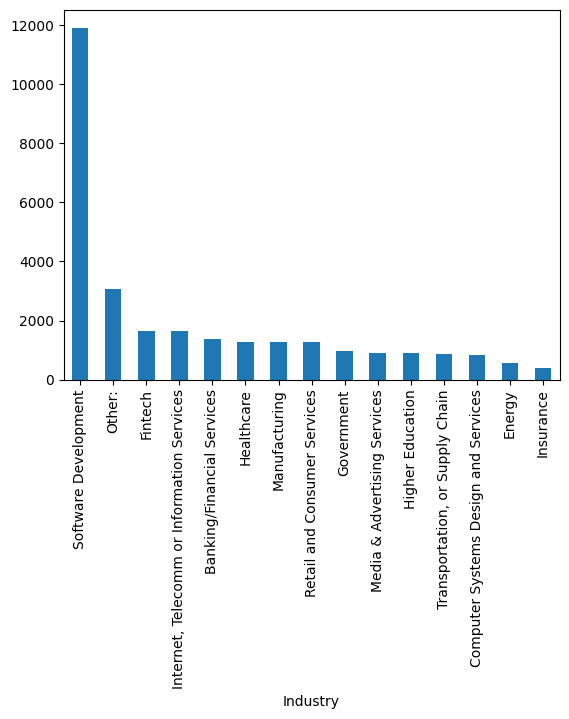

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


<Axes: xlabel='Industry'>

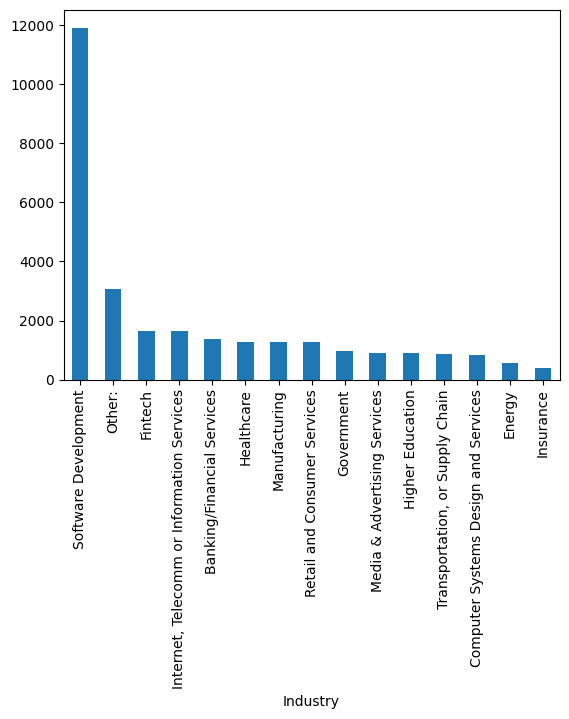

In [13]:
##Write your code here
df['Industry'].dropna().value_counts().plot.bar()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [16]:
##Write your code here
df['ConvertedCompYearly'].dropna().describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

In [26]:
df['ConvertedCompYearly'].dropna().describe().iloc[1]+(df['ConvertedCompYearly'].dropna().describe().iloc[2]*3)

np.float64(646426.206521534)

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


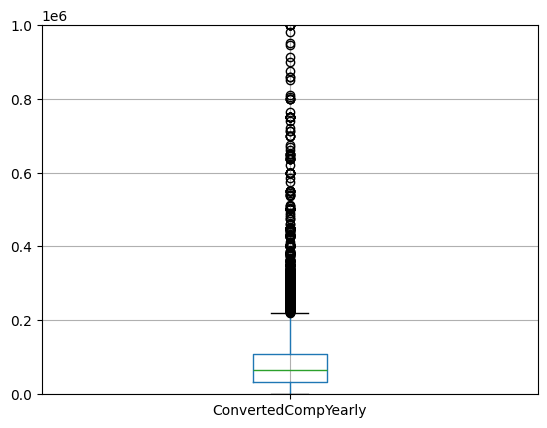

In [41]:
##Write your code here
Iqr=df['ConvertedCompYearly'].dropna().describe().iloc[6]-df['ConvertedCompYearly'].dropna().describe().iloc[4]
out1=df['ConvertedCompYearly'].dropna().describe().iloc[4]-1.5*Iqr
out2=df['ConvertedCompYearly'].dropna().describe().iloc[6]+1.5*Iqr
ax=df.boxplot(column='ConvertedCompYearly')
ax.set_ylim(0, 1000000)
plt.show()

In [42]:
df2=df['ConvertedCompYearly'].dropna()

In [47]:
(df2>out2).sum()

np.int64(978)

In [39]:
out2

np.float64(220860.75)

In [35]:
out1

np.float64(-80177.25)

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [49]:
##Write your code here
df2=df[df['ConvertedCompYearly']<out2]

In [52]:
len(df2['ConvertedCompYearly'])

22457

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [53]:
##Write your code here
float_df = df2.select_dtypes(include='float')

In [63]:
float_df['Age']

72       21.0
374      29.5
379      39.5
385      39.5
389      29.5
         ... 
41179    29.5
41180    29.5
41184    49.5
41185    39.5
41186    21.0
Name: Age, Length: 22457, dtype: float64

In [60]:

replacements = {'Under 18 years old': 18, '35-44 years old': 39.5,'45-54 years old': 49.5,'18-24 years old': 21,'25-34 years old': 29.5,'55-64 years old': 59.5,'65 years or older': 65,'Prefer not to say':0}
df['Age'] = df['Age'].replace(replacements)

/tmp/ipykernel_300/90753373.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].replace(replacements)


In [65]:
df2=df[df['ConvertedCompYearly']<out2]
float_df = df2.select_dtypes(include='float')
float_df=float_df[float_df['Age']>0]

In [72]:
float_df.corr()['Age']

Age                    1.000000
CompTotal             -0.021468
WorkExp                0.844091
JobSatPoints_1        -0.039078
JobSatPoints_4        -0.069938
JobSatPoints_5        -0.096953
JobSatPoints_6        -0.051808
JobSatPoints_7        -0.083895
JobSatPoints_8        -0.051709
JobSatPoints_9        -0.084370
JobSatPoints_10       -0.111910
JobSatPoints_11       -0.106746
ConvertedCompYearly    0.371421
JobSat                 0.066864
Name: Age, dtype: float64

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
